In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Credit Card Transactions.csv")

In [3]:
data.shape

(5000, 23)

In [4]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [5]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [6]:
data[data==0].count()

Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
dtype: int64

In [7]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [8]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [9]:
li = list(data[data.Default_On_Payment == 0].sample(n=2000).index)

In [10]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

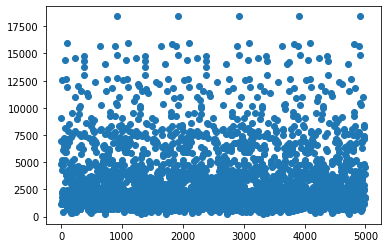

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [13]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)

In [14]:
data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


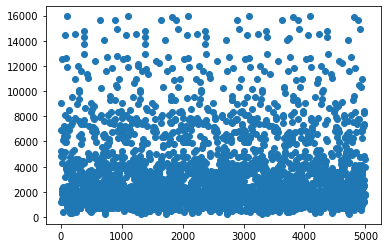

In [15]:
plt.scatter(data.index, data['Credit_Amount'])

In [16]:
data

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,A12,24,A34,A43,1743,A61,A75,4,A93,A101,...,A122,48,A143,A152,2,A172,1,A191,A201,0
4993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,0
4995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
4998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [17]:
data.dtypes

Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

In [18]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [21]:
data.reset_index(drop=True,inplace=True)

In [22]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
2,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
3,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0
4,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [23]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [24]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
2,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,0
3,1,36,2,1,6948,0,2,2,2,0,...,2,35,2,0,1,3,1,1,0,0
4,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1


In [25]:
data.dtypes

Status_Checking_Acc            int64
Duration_in_Months             int64
Credit_History                 int64
Purposre_Credit_Taken          int64
Credit_Amount                  int64
Savings_Acc                    int64
Years_At_Present_Employment    int64
Inst_Rt_Income                 int64
Marital_Status_Gender          int64
Other_Debtors_Guarantors       int64
Current_Address_Yrs            int64
Property                       int64
Age                            int64
Other_Inst_Plans               int64
Housing                        int64
Num_CC                         int64
Job                            int64
Dependents                     int64
Telephone                      int64
Foreign_Worker                 int64
Default_On_Payment             int64
dtype: object

In [26]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Other_Inst_Plans                1.039983
Foreign_Worker                  1.061490
Marital_Status_Gender           1.073093
Other_Debtors_Guarantors        1.076803
Purposre_Credit_Taken           1.086251
Dependents                      1.099656
Savings_Acc                     1.109653
Status_Checking_Acc             1.175006
Years_At_Present_Employment     1.202768
Current_Address_Yrs             1.208476
Num_CC                          1.231667
Inst_Rt_Income                  1.270396
Credit_History                  1.294153
Telephone                       1.308880
Job                             1.319596
Age                             1.334710
Housing                         1.338344
Property                        1.395718
Duration_in_Months              1.792826
Credit_Amount                   2.140389
const                          57.633141
dtype: float64

In [28]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Credit_Amount                  3.725539e-205
Status_Checking_Acc            5.305357e-104
Credit_History                  5.934803e-47
Duration_in_Months              8.921956e-43
Savings_Acc                     1.844984e-29
Purposre_Credit_Taken           8.283907e-22
Age                             1.722299e-21
Property                        1.240648e-17
Housing                         2.147550e-15
Years_At_Present_Employment     4.408023e-13
Other_Inst_Plans                8.304161e-11
Foreign_Worker                  2.178929e-08
Marital_Status_Gender           1.268907e-07
Other_Debtors_Guarantors        2.981457e-05
Inst_Rt_Income                  3.219349e-05
Telephone                       1.018225e-02
Num_CC                          1.205251e-02
Job                             8.839070e-02
Current_Address_Yrs             4.198746e-01
Dependents                      8.579272e-01
const                           1.000000e+00
dtype: float64

In [29]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


const                            0.000000
Dependents                      14.207280
Current_Address_Yrs             58.012538
Job                             91.160930
Num_CC                          98.794749
Telephone                       98.981775
Inst_Rt_Income                  99.996781
Other_Debtors_Guarantors        99.997019
Marital_Status_Gender           99.999987
Foreign_Worker                  99.999998
Other_Inst_Plans               100.000000
Years_At_Present_Employment    100.000000
Housing                        100.000000
Savings_Acc                    100.000000
Credit_Amount                  100.000000
Purposre_Credit_Taken          100.000000
Property                       100.000000
Age                            100.000000
Credit_History                 100.000000
Duration_in_Months             100.000000
Status_Checking_Acc            100.000000
dtype: float64

In [30]:
import scipy.stats as stats
stats.f_oneway(X['Credit_Amount'],y)

F_onewayResult(statistic=3898.7663906896564, pvalue=0.0)

In [31]:
stats.f_oneway(X['Age'],y)

F_onewayResult(statistic=27895.045934141628, pvalue=0.0)

In [32]:
Significance[Significance >= 99.9].index

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors', 'Property', 'Age',
       'Other_Inst_Plans', 'Housing', 'Foreign_Worker'],
      dtype='object')

In [33]:
X_ = X[Significance[Significance >= 99.9].index]

In [34]:
log = LogisticRegression()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33)

In [36]:
log.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
log.score(X_test,y_test)

0.7515151515151515

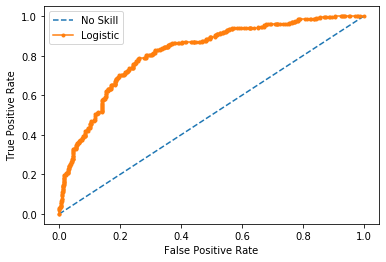

In [38]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = log.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,log.predict(X_test))

array([[373, 109],
       [137, 371]])